## Analysis of US Elections 1976-2020

In [206]:
#Loading the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [208]:
df =pd.read_csv("2_election.csv") #Load CSV file

#### 1. Data Understanding and Cleaning

In [210]:
df.head(10) # Print first 10 columns 

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


In [212]:
df.isna().sum() # Identify missing values

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

In [214]:
df.info() # Collect column names, counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [216]:
df.describe() # Collect summary statistics 

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0,0.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0,NaN
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0,NaN
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0,NaN
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0,NaN
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0,NaN
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0,NaN


In [218]:
df_new = df.copy()

In [220]:
# Fill missing values in the selected columns with the string 'Unknown'
df_new['candidate'] = df_new['candidate'].fillna('Unknown Candidate')
df_new['party_detailed'] = df_new['party_detailed'].fillna('Unknown Party')
df_new['writein'] = df_new['writein'].fillna('Unknown')

In [222]:
df_new.drop(['notes'], axis=1, inplace=True) # Drop the notes row

All of the rows with missing values	were objects and therefore could not be filled in with the mean, median, mode, etc. The fillna function was used to fill the missing values with unknown. Due to the notes row missing all of its data the entire row was dropped.

In [224]:
df_new[df_new.duplicated()] # Check for duplicate columns 

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,party_simplified


In [226]:
# Calculate the percentage of total votes received by each candidate and store it in a new column 'vote_percentage'
df_new['vote_percentage'] = (df_new['candidatevotes'] / df_new['totalvotes']) * 100

This calculation is useful for understanding the proportion of votes a candidate received relative to the total number of votes cast.

#### 2: Exploratory Data Analysis (EDA)

In [228]:
# Group the data by 'year' and calculate the total sum of votes for each year
total_votes_by_year = df_new.groupby('year')['totalvotes'].sum()
print(total_votes_by_year)

year
1976     605944064
1980     663902096
1984     609936856
1988     537099170
1992     770486377
1996     728343795
2000     783441739
2004     768259747
2008     992684830
2012     879479158
2016     941573717
2020    1865852281
Name: totalvotes, dtype: int64


In [258]:
# Count the occurrences of each unique value in the 'office' column
most_common_office = df_new['office'].value_counts()
print(most_common_office)

office
US PRESIDENT    4287
Name: count, dtype: int64


In [232]:
# Sum the total votes for each state
state_votes = df_new.groupby('state')['totalvotes'].sum()
print(state_votes)

state
ALABAMA                  110489701
ALASKA                    20874476
ARIZONA                  140080325
ARKANSAS                  88670493
CALIFORNIA              1007277369
COLORADO                 324033482
CONNECTICUT              118547491
DELAWARE                  30246893
DISTRICT OF COLUMBIA      20009232
FLORIDA                  685246872
GEORGIA                  210805901
HAWAII                    29540989
IDAHO                     42699871
ILLINOIS                 500075631
INDIANA                  175718876
IOWA                     175378878
KANSAS                    71464299
KENTUCKY                 151861835
LOUISIANA                186432197
MAINE                     48919346
MARYLAND                 221271749
MASSACHUSETTS            246852975
MICHIGAN                 398157907
MINNESOTA                316582635
MISSISSIPPI               85208015
MISSOURI                 161477941
MONTANA                   25810758
NEBRASKA                  46507352
NEVADA        

In [234]:
# Sort candidates by total votes in ascending order
top_candidates = df_new[['candidate', 'totalvotes']].sort_values(by='totalvotes', ascending=False)

# Print the top 15 candidates 
print(top_candidates.head(15))

                            candidate  totalvotes
3782                    PIERCE, BROCK    17500881
3773              BIDEN, JOSEPH R. JR    17500881
3783                   JOSEPH KISHORE    17500881
3781                     MARK CHARLES    17500881
3780  JANOS, JAMES G. "JESSE VENTURA"    17500881
3779                   CARROLL, BRIAN    17500881
3778          LA RIVA, GLORIA ESTELLA    17500881
3777    DE LA FUENTE, ROQUE ""ROCKY""    17500881
3776                   HAWKINS, HOWIE    17500881
3775                    JORGENSEN, JO    17500881
3774                 TRUMP, DONALD J.    17500881
3430          LA RIVA, GLORIA ESTELLA    14181595
3427                    JOHNSON, GARY    14181595
3426                 TRUMP, DONALD J.    14181595
3425                 CLINTON, HILLARY    14181595


In [236]:
# Convert the 'writein' column to numeric values
df_new['writein'] = pd.to_numeric(df_new['writein'], errors='coerce')

# Sum the total 'writein' votes for each year
writein_votes = df_new.groupby('year')['writein'].sum()
print(writein_votes)

year
1976     12.0
1980     18.0
1984      0.0
1988     17.0
1992     19.0
1996     20.0
2000     22.0
2004     31.0
2008     33.0
2012     29.0
2016     46.0
2020    230.0
Name: writein, dtype: float64


In [238]:
# Sum the total votes for each political party (simplified version)
party_votes = df_new.groupby('party_simplified')['totalvotes'].sum()
print(party_votes)

party_simplified
DEMOCRAT       1344886700
LIBERTARIAN    1177252462
OTHER          6284935371
REPUBLICAN     1339929297
Name: totalvotes, dtype: int64


#### 3: Data Visualization and Interpretation

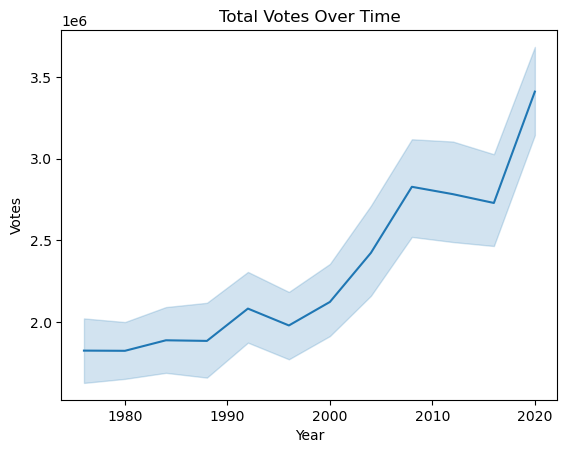

In [240]:
# Creating the line plot
sns.lineplot(data=df_new,x='year',y='totalvotes')

# Adding title and labels
plt.title('Total Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Votes')

# Show the plot
plt.show()

 Although the graph is not a perfect linear line, year and total votes exhibit a positive relationship. There are multiple dips over time, such as 1993-1996 and 2008 to 2012, but there are strong increases from 1995 to 2008 and 2015 to 2020. Overall there is a significant increase in total votes from 1976 to 2020.

In [62]:
# Create a subset of columns (state attributes and total votes) for correlation analysis
df_subset = df_new[['state_fips','state_cen','state_ic','totalvotes']]

# Calculate the correlation matrix for the selected subset
correlation_matrix = df_subset.corr()

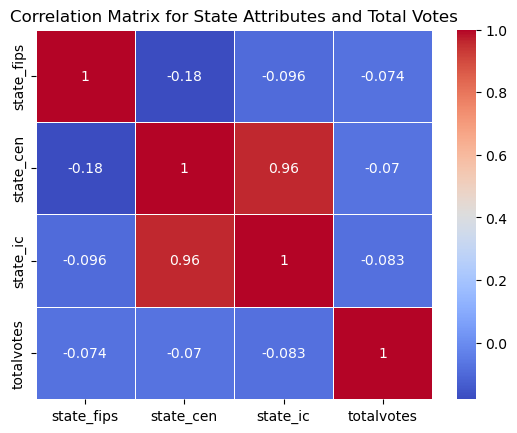

<Figure size 640x480 with 0 Axes>

In [64]:
# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title 
plt.title('Correlation Matrix for State Attributes and Total Votes')

#Show the plot
plt.show()


The heatmap demonstrates that there is little to no correlation between state attributes and total votes. On the plot, total votes have negative values and blue boxes for all of that state attribute variables. This could allude to location having no impact on total votes.  

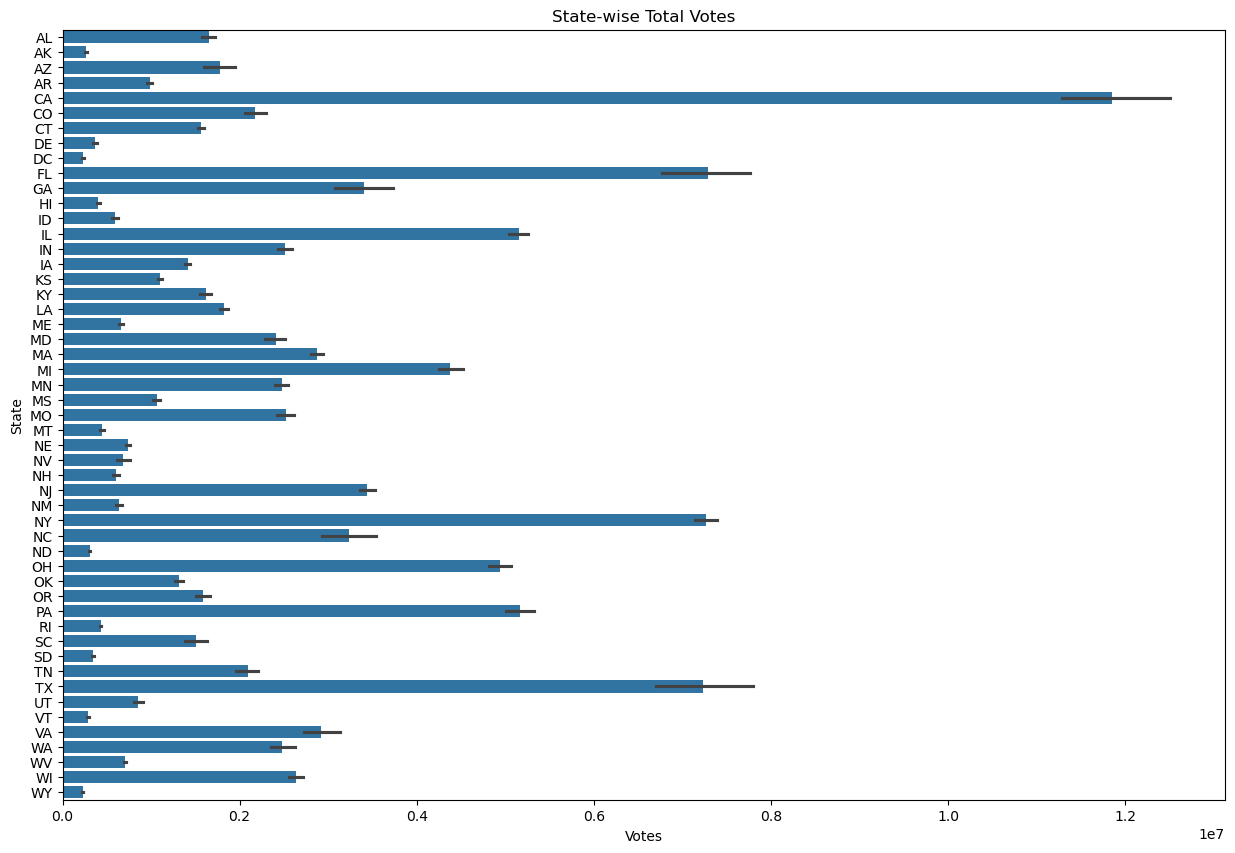

In [68]:
# Create barplot
sns.barplot(data=df_new,x='totalvotes',y='state_po',orient = 'h')

# Create dimensions 
plt.figure(figsize=(15, 10))

# Add title and labels
plt.title('State-wise Total Votes')
plt.xlabel('Votes')
plt.ylabel('State')

This graph shows that the states with the highest votes are California, Texas, and Florida. The states with the lowest votes are Wyoming, Alaska, and Vermont. These results show that population is strongly correlated with total votes. The most populated states have the highest total votes and vice versa.

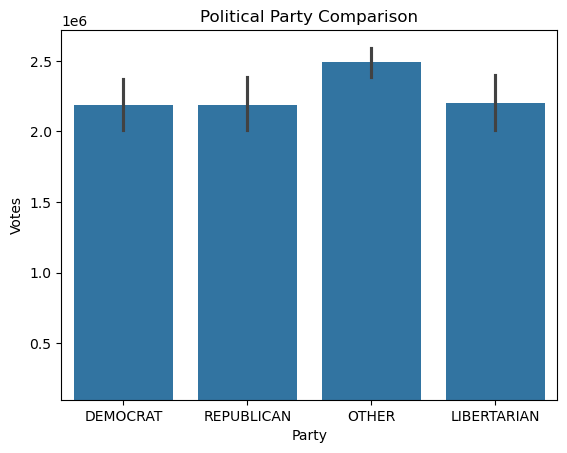

In [267]:
# Create barplot
sns.barplot(data=df_new,x='party_simplified',y='totalvotes')

#Add title and labels
plt.title('Political Party Comparison')
plt.xlabel('Party')
plt.ylabel('Votes')

# Limit Y-axis 
plt.ylim(bottom=100000)

# Show plot
plt.show()

This graph demonstrates that democrat, republican, and libertarian all roughly received the same number of votes. Other, is noticeably higher than the other parties, however this variable contains a large variety of parties.  

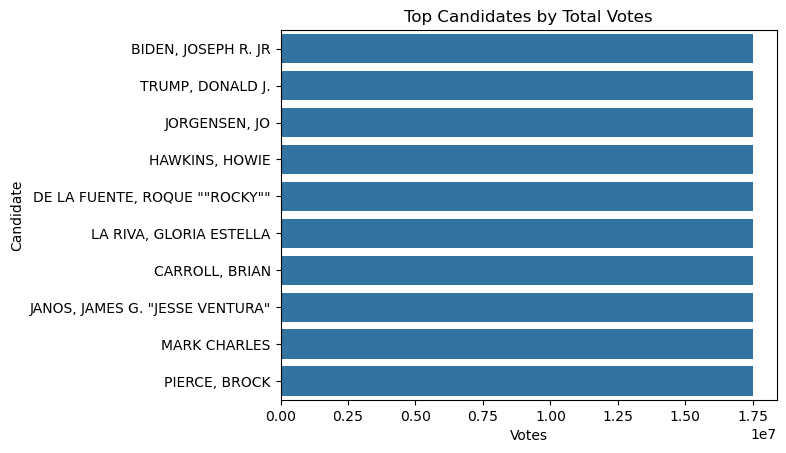

In [158]:
# Select the top 10 candidates with the highest total votes
top_candidates = df_new[['candidate', 'totalvotes']].nlargest(10, 'totalvotes')

# Create barplot
sns.barplot(data=top_candidates, x='totalvotes', y='candidate')

# Add title and labels
plt.title('Top Candidates by Total Votes')
plt.xlabel('Votes')
plt.ylabel('Candidate')

# Show plot
plt.show()

The graph shows that all of the top ten candidates roughly received the same number of votes. This could possibly be the number when 270 electoral votes were met or a mistake in the dataset. This bar graph shows an anomaly in the dataset.  

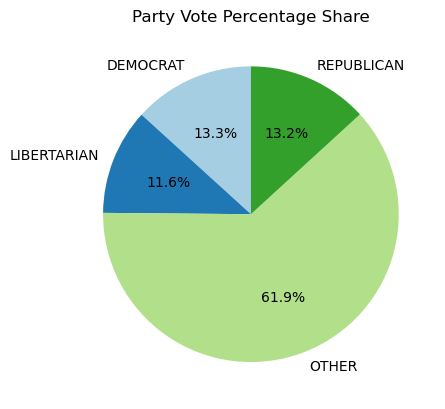

In [186]:
# Sum the total votes for each political party (based on simplified party names)
party_votes = df_new.groupby('party_simplified')['totalvotes'].sum()

# Create pie chart
plt.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Party Vote Percentage Share')

# Show plot
plt.show()

The pie chart shows that democrats received 13.3%, republicans received 13.2%, libertarians received 11.6%, and other political parties hold 61.9% of the vote. These numbers show that the party's within the two-party system hold nearly the same amount of votes, while smaller political parties dominate a large share of total votes.  

#### 4: Expected Output

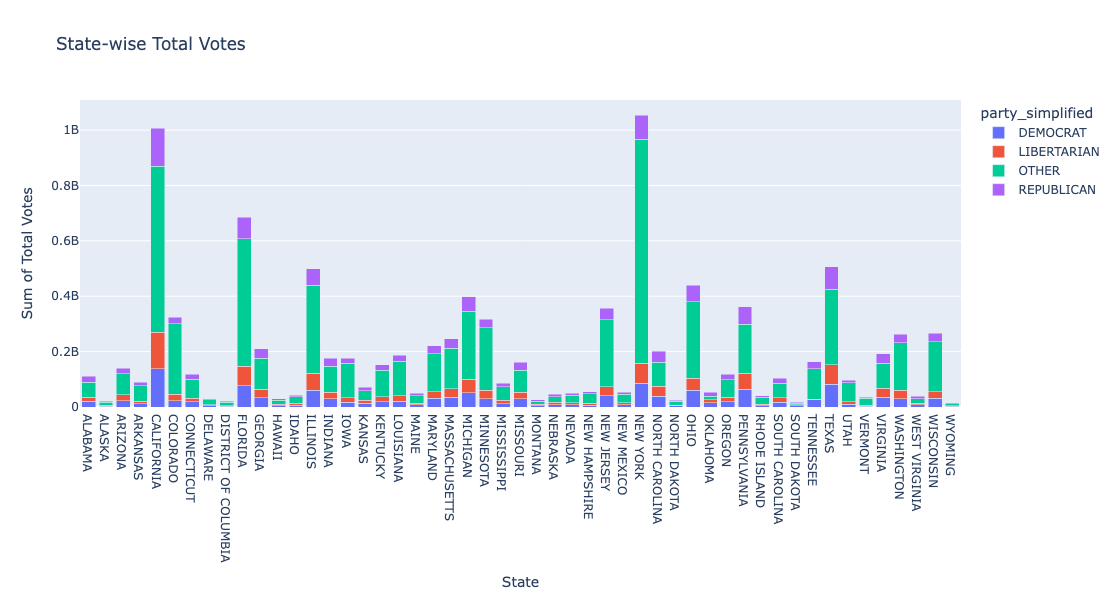

<Figure size 640x480 with 0 Axes>

In [246]:
# Group the data by 'state' and 'party_simplified' and calculate the sum of 'totalvotes' for each group

state_party_votes = df_new.groupby(['state', 'party_simplified'])['totalvotes'].sum().reset_index()

# Create a stacked bar plot to visualize the total votes by state and party

fig = px.bar(
    state_party_votes,
    x='state',
    y='totalvotes',
    color='party_simplified',
    title='State-wise Total Votes',
    labels={'totalvotes': 'Sum of Total Votes', 'state': 'State'},
    barmode='stack'
)
# Set the x-axis to order states alphabetically and adjust plot size
fig.update_layout(
    xaxis={'categoryorder': 'category ascending'},
    height=600,
    width=1000
)
# Show the plot 
fig.show()

The bar graph clearly shows which states have high voter turnout; however, it is still hard to determine red and blue states due to the impact of the other party category. The green color is the other party category, and it makes up the majority of many of the state's bars, for most states it appears that republican, democrats and libertarian are around the same size.  

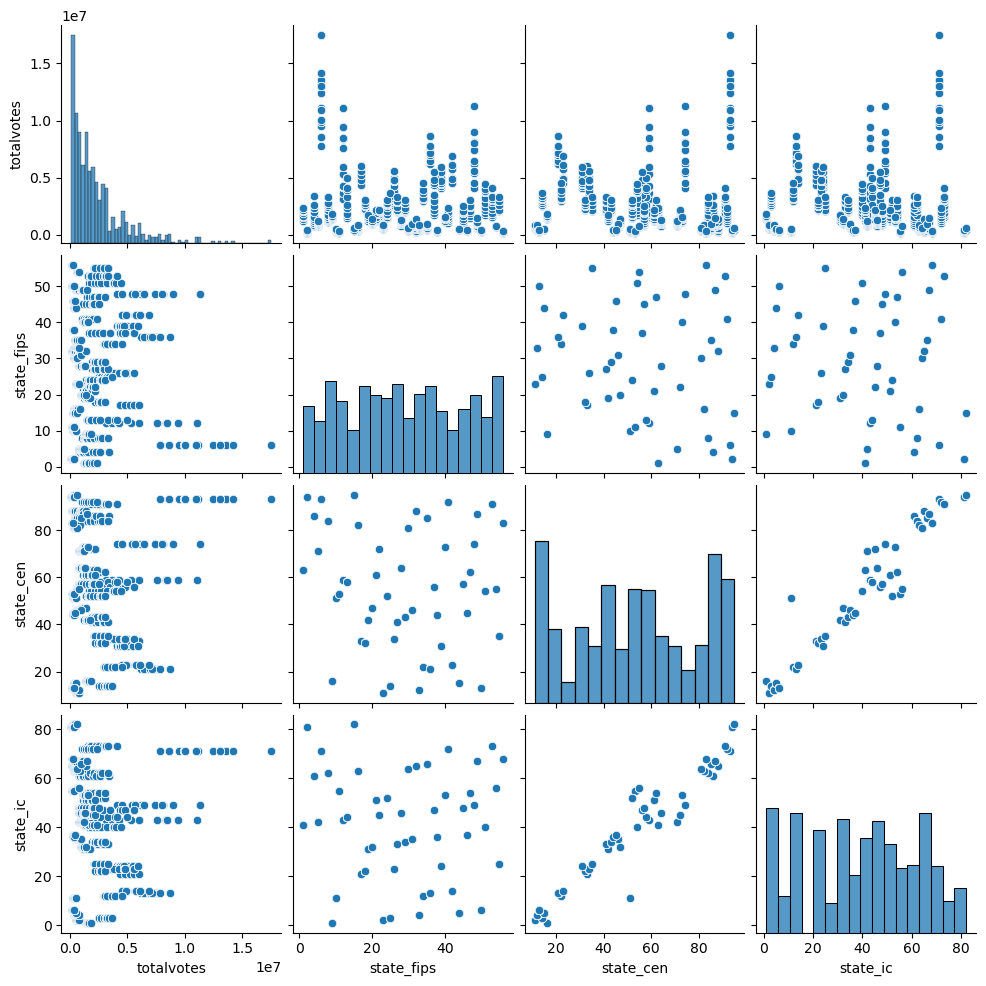

In [176]:
#  Create a pairplot to visualize relationships between total votes and state attributes (fips, cen, ic)
sns.pairplot(df_new[["totalvotes", "state_fips", "state_cen","state_ic"]])

#### 5. Insights and Generalizations

In [128]:
# Sort the dataset by 'totalvotes' in descending order to get the parties with the most votes
top_parties = df_new[['party_detailed', 'totalvotes']].sort_values(by='totalvotes', ascending=False)
# Print the top 30 parties 
print(top_parties.head(30))

                  party_detailed  totalvotes
3782                 INDEPENDENT    17500881
3773                    DEMOCRAT    17500881
3783                 INDEPENDENT    17500881
3781                 INDEPENDENT    17500881
3780                 INDEPENDENT    17500881
3779   AMERICAN SOLIDARITY PARTY    17500881
3778             PEACE & FREEDOM    17500881
3777        AMERICAN INDEPENDENT    17500881
3776                       GREEN    17500881
3775                 LIBERTARIAN    17500881
3774                  REPUBLICAN    17500881
3430             PEACE & FREEDOM    14181595
3427                 LIBERTARIAN    14181595
3426                  REPUBLICAN    14181595
3425                    DEMOCRAT    14181595
3428                       GREEN    14181595
3429               Unknown Party    14181595
2755  AMERICAN INDEPENDENT PARTY    13561900
2756                       GREEN    13561900
2757                 INDEPENDENT    13561900
2754                 LIBERTARIAN    13561900
2753      

I created a list of the parties in the party detailed variable to determine what are the most promininet parties in the other category. 

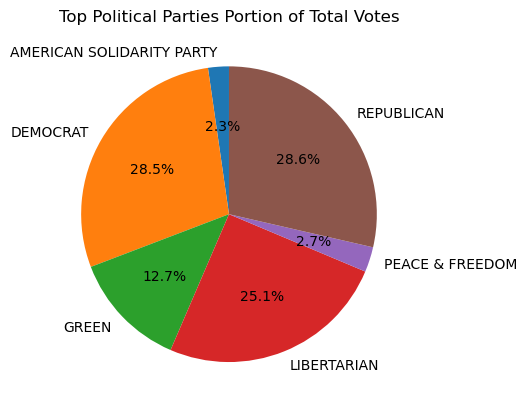

In [182]:
#  List of parties of interest to filter the dataset
parties_of_interest = ['AMERICAN SOLIDARITY PARTY', 'GREEN', 'PEACE & FREEDOM','REPUBLICAN','DEMOCRAT','LIBERTARIAN']

#  Filter the dataset to include only the rows for the specified parties
filtered_parties = df_new[df_new['party_detailed'].isin(parties_of_interest)]

# Group by 'party_detailed' and calculate the sum of 'totalvotes' for each party
party_votes = filtered_parties.groupby('party_detailed')['totalvotes'].sum()

# Create pie chart
plt.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Top Political Parties Portion of Total Votes')

# Show plot
plt.show()

The top three identified parties were selected, along with the top three parties from the other category. This pie chart helps display the true portion of the votes received by non-mainstream parties. This graph is helpful because the previous pie chart exaggerates the influence the other parties had on elections, while this pie chart demonstrates that impact is not as big as it is perceived.  

#### Conclusion

One of the most prominent findings was the overall growth in total votes, particularly in the years following 1992, with a sharp increase in voter turnout seen in the 2020 election. The analysis of state-wise total votes revealed that states like California, Texas, and Florida contributed the most to the total vote count, emphasizing the role of population size in shaping election outcomes. Regarding political parties, the visualizations suggested that while the major political parties (Democrat, Republican, and Libertarian) received similar levels of support, the "Other" category (comprising smaller parties) held a significant share of the total vote. Furthermore, the analysis of top candidates by vote share illustrated an anomaly, where many candidates appeared to have received identical vote totals.